### Импорт нужных библиотек

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline
warnings.simplefilter('ignore')

### Импорт данных

In [3]:
df = pd.read_csv("bank.csv", sep = ",", encoding="windows-1251")

### Словесное описание каждого столбца DataFrame df

##### age
>Age of the client
##### job
>Type of job
##### education
>Education Level
##### default
>Credit in default
##### balance
>average yearly balance, in euros
##### housing
>If the person has taken a Housing Loan
##### loan
>If the person has taken a Personal Loan
##### contact
>contact communication type
##### day
>Day of Week of Contact
##### month
>Contact Month
##### duration
>Contact Duration
##### campaign
>number of contacts performed during this campaign to the client
##### pdays
>number of days that passed by after the client was last contacted
##### previous
>number of contacts performed before this campaign
##### poutcome
>outcome of the previous marketing campaign
##### y
>has the client subscribed a term deposit?

### Вывод DataFrame df

In [80]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


### Размер Dataframe df

In [5]:
df.shape

(4521, 17)

### Посчитать пустые значения и избавиться, если таковые имеются

In [6]:
df.isna().sum() #df.info()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Пустых значений не оказалось

### Определяем типы данных столбцов DataFrame df

In [7]:
df.info() #df.dtypes()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


### Описание каждого столбца с типом данных int 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0
y,4521.0,0.115240,0.319347,0.0,0.0,0.0,0.0,1.0


### Описание каждого столбца df

#### Создание list с названиями всех столбцов DataFrame df

In [4]:
list_ = df.columns

#### Применение функции pandas.describe() к каждому столбцу DataFrame df

In [13]:
for x in range(len(df.columns)):
    print('\t', list_[x], '\n')
    print(df[list_[x]].describe(), '\n')

	 age 

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64 

	 job 

count           4521
unique            12
top       management
freq             969
Name: job, dtype: object 

	 marital 

count        4521
unique          3
top       married
freq         2797
Name: marital, dtype: object 

	 education 

count          4521
unique            4
top       secondary
freq           2306
Name: education, dtype: object 

	 default 

count     4521
unique       2
top         no
freq      4445
Name: default, dtype: object 

	 balance 

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64 

	 housing 

count     4521
unique       2
top        yes
freq      2559
Name: housing, dtype: object 

	 loan 



### Визуализация

#### Гистограмма распределения

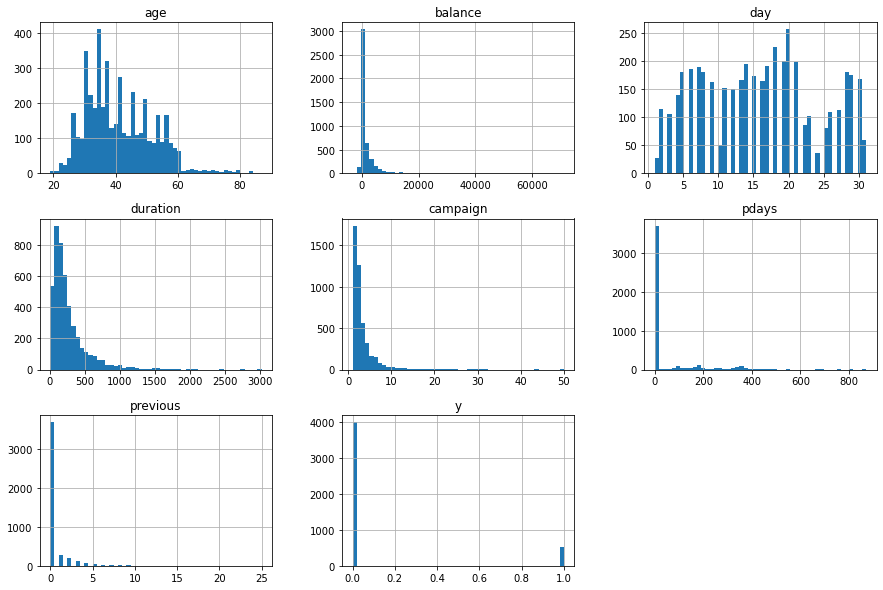

In [67]:
df.hist(figsize=(15,10), bins = 50);

#### Попарные зависимости 

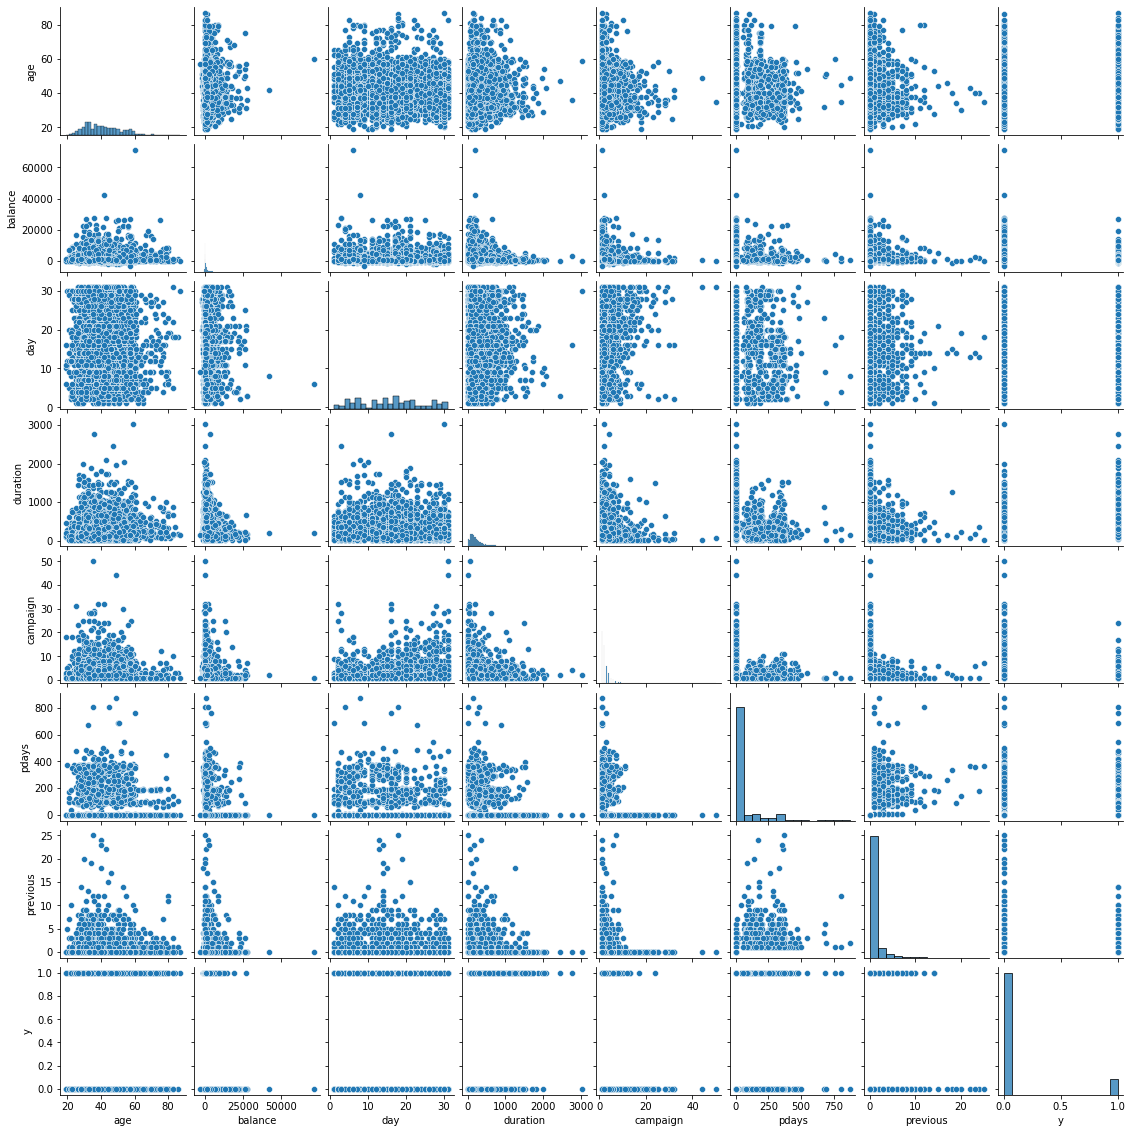

In [72]:
list_ = df.columns
sns.pairplot(df[list_],height=2);

### 3 задание "Описание задания"

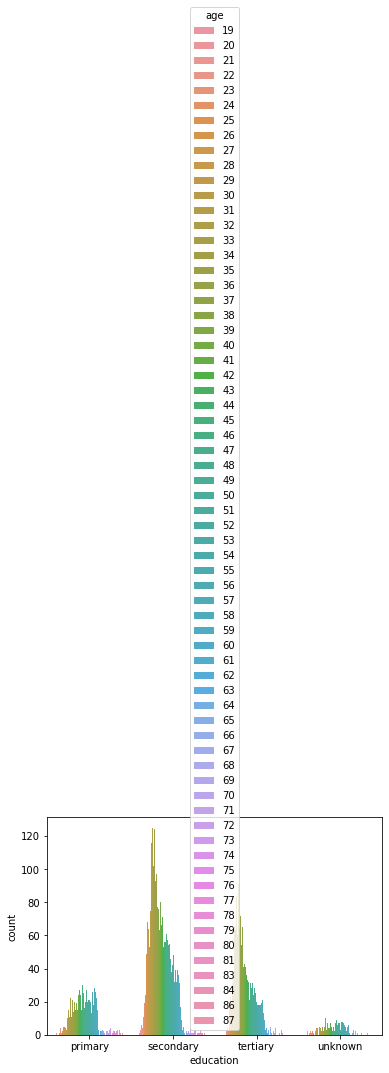

In [74]:
sns.countplot(x='education',hue='age',data=df);

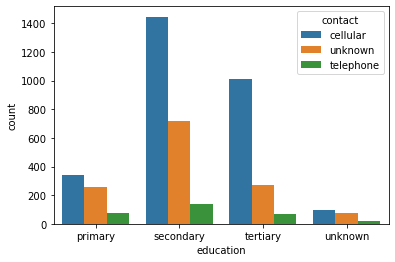

In [75]:
sns.countplot(x='education',hue='contact',data=df);

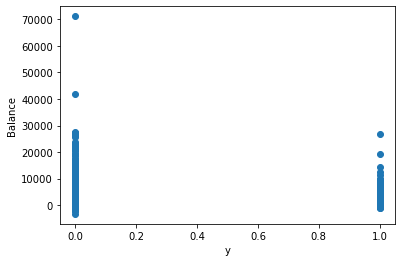

In [9]:
plt.plot(df.y, df.balance, 'o')
plt.xlabel('y')
plt.ylabel('Balance')
plt.show()

#### Подсчет долей значений всех столбцов DataFrame df

In [5]:
for x in range(len(df.columns)):
    print('\t', list_[x], '\n')
    print('\tВ процентах%\n')
    print(df[list_[x]].value_counts(normalize=True) * 100, '\n')

	 age 

	В процентах%

34    5.109489
32    4.954656
31    4.401681
36    4.158372
33    4.114134
        ...   
68    0.044238
87    0.022119
81    0.022119
86    0.022119
84    0.022119
Name: age, Length: 67, dtype: float64 

	 job 

	В процентах%

management       21.433311
blue-collar      20.924574
technician       16.987392
admin.           10.572882
services          9.223623
retired           5.087370
self-employed     4.047777
entrepreneur      3.715992
unemployed        2.831232
housemaid         2.477328
student           1.857996
unknown           0.840522
Name: job, dtype: float64 

	 marital 

	В процентах%

married     61.866844
single      26.454324
divorced    11.678832
Name: marital, dtype: float64 

	 education 

	В процентах%

secondary    51.006415
tertiary     29.860650
primary      14.996682
unknown       4.136253
Name: education, dtype: float64 

	 default 

	В процентах%

no     98.318956
yes     1.681044
Name: default, dtype: float64 

	 balance 

	В процентах

#### Удаляем столбец month
>так как столбец не несет важной информации
#### Создаем копию DataFrame df
>df_off

In [6]:
df_off = df.drop('month', 1)

#### Вывод dataframe df_off

In [16]:
df_off.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,226,1,-1,0,unknown,0


### Заменяем типы object на int

#### Объявляем sklearn.LabelEncoder

In [7]:
le = LabelEncoder()

#### Создаем копию df_off

In [8]:
df_normalized = df_off.copy()

#### Создание list с названиями всех столбцов DataFrame df_normalized

In [9]:
list_ = df_off.columns

#### Применяем le для столбцов с типом данных object в DataFrame df_normalized

In [10]:
for x in range(len(df_normalized.columns)):
    if df[list_[x]].dtype == "object":
        df_normalized[list_[x]] = le.fit_transform(df_normalized[list_[x]])

#### Проверка типов данных DataFrame df_normalized

In [11]:
df_normalized.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int64
dtype: object

#### Вывод типов данных столбцов DataFrame df_normalized

In [19]:
df_normalized.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int64
dtype: object

#### Подсчет количества уникальных значений по столбцам DataFrame df_normalized

In [20]:
for x in range(len(df_normalized.columns)):
    print('\t', list_[x], '\n')
    print(df_normalized[list_[x]].value_counts())

	 age 

34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: age, Length: 67, dtype: int64
	 job 

4     969
1     946
9     768
0     478
7     417
5     230
6     183
2     168
10    128
3     112
8      84
11     38
Name: job, dtype: int64
	 marital 

1    2797
2    1196
0     528
Name: marital, dtype: int64
	 education 

1    2306
2    1350
0     678
3     187
Name: education, dtype: int64
	 default 

0    4445
1      76
Name: default, dtype: int64
	 balance 

0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: balance, Length: 2353, dtype: int64
	 housing 

1    2559
0    1962
Name: housing, dtype: int64
	 loan 

0    3830
1     691
Name: loan, dtype: int64
	 contact 

0    2896
2    1324
1     301
Name: contact, dtype: int64
	 day 

20    257
18    226
19    201
21    198
14    195
17    191
7     190
6     187
28    181
5     181
8 

### Обучить модели и выбрать лучшую по точности

#### Разбиение DataFrame df_normalized на тестовые переменные X, y 

In [13]:
predict = "y"
X = df_normalized.drop(predict, 1)
y = df_normalized[predict]

#### Метод KNN

In [14]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [15]:
%%time
best_score = 0
for i in range(1,30,1):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    acc = knn_model.score(x_test, y_test) 
    #print("accuracy", acc)
    #print("knn_neighbours", knn_model.n_neighbors)
    if acc > best_score:
        best_score = acc
        best_n = i
knn_model = KNeighborsClassifier(n_neighbors=best_n)
knn_model.fit(x_train, y_train)
#print('Best_acc', knn_model.score(x_train, y_train))
#print('Best_neighbours', best_n)
#print('Final_acc', knn_model.score(x_test, y_test))

accuracy 0.8445099484156227
knn_neighbours 1
accuracy 0.8791451731761238
knn_neighbours 2
accuracy 0.8695652173913043
knn_neighbours 3
accuracy 0.8791451731761238
knn_neighbours 4
accuracy 0.8761974944731025
knn_neighbours 5
accuracy 0.8850405305821666
knn_neighbours 6
accuracy 0.8835666912306559
knn_neighbours 7
accuracy 0.8828297715549005
knn_neighbours 8
accuracy 0.8791451731761238
knn_neighbours 9
accuracy 0.8835666912306559
knn_neighbours 10
accuracy 0.8820928518791452
knn_neighbours 11
accuracy 0.8857774502579219
knn_neighbours 12
accuracy 0.8820928518791452
knn_neighbours 13
accuracy 0.8850405305821666
knn_neighbours 14
accuracy 0.8843036109064112
knn_neighbours 15
accuracy 0.8843036109064112
knn_neighbours 16
accuracy 0.8835666912306559
knn_neighbours 17
accuracy 0.8850405305821666
knn_neighbours 18
accuracy 0.8850405305821666
knn_neighbours 19
accuracy 0.8850405305821666
knn_neighbours 20
accuracy 0.8857774502579219
knn_neighbours 21
accuracy 0.8872512896094326
knn_neighbours 

KNeighborsClassifier(n_neighbors=22)

In [48]:
#%%time
#first_knn = KNeighborsClassifier()
#knn_params = {'n_neighbors':range(1,40,1)}
#knn_grid = GridSearchCV(first_knn,knn_params,cv=5)
#knn_grid.fit(x_train,y_train)
#print("Лучшая точность: ", knn_grid.best_score_)
#print("Лучший параметр: ", knn_grid.best_params_)
#print("Результат: ", knn_grid.score(x_test, y_test))

#### Метод DecisionTree

In [18]:
%%time
best_acc = 0
for i in range(1,30,1):
    tree = DecisionTreeClassifier(random_state=0, max_depth=i)
    tree.fit(x_train, y_train)
    acc = tree.score(x_test, y_test)
    if acc > best_acc:
        best_acc = acc
        max_depth = i
tree = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
tree.fit(x_train, y_train)
print('Best_acc', tree.score(x_train, y_train))
print('Best_max_depth', max_depth)
print('Final_acc', tree.score(x_test, y_test))

Best_acc 0.9396333754740834
Best_max_depth 7
Final_acc 0.8931466470154753
Wall time: 366 ms


In [49]:
#%%time
#tree = DecisionTreeClassifier(random_state=0)
#tree_params = {'max_depth':np.arange(1,30,3)}
#tree_grid = GridSearchCV(tree,tree_params,cv=5)
#tree_grid.fit(x_train, y_train)
#print("Лучшая точность: ", tree_grid.best_score_)
#print("Лучший параметр: ", tree_grid.best_params_)
#print("Результат: ", tree_grid.score(x_test, y_test))

#### Метод RandomForest

In [59]:
%%time
best_acc = 0
for i in range(1, 100, 3):
    forest = RandomForestClassifier(n_estimators=i)
    forest.fit(x_train, y_train)
    acc = forest.score(x_test, y_test)
    if acc > best_acc:
        best_acc = acc
        best_estimators = i
forest = RandomForestClassifier(n_estimators=best_estimators)
forest.fit(x_train, y_train)
print('Best_acc', forest.score(x_train, y_train))
print('Best_estimators', best_estimators)
print('Final_acc', forest.score(x_test, y_test))

Best_acc 1.0
Best_estimators 61
Final_acc 0.8901989683124539


In [60]:
#%%time
#forest = RandomForestClassifier()
#forest_params = {'n_estimators':np.arange(1,30,5)}
#forest_grid = GridSearchCV(forest,forest_params,cv=5)
#forest_grid.fit(x_train, y_train)
#print("Лучшая точность: ", forest_grid.best_score_)
#print("Лучший параметр: ", forest_grid.best_params_)
#print("Результат: ", forest_grid.score(x_test, y_test))

In [24]:
df_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
job,4521.0,4.411192,3.255716,0.0,1.0,4.0,7.0,11.0
marital,4521.0,1.147755,0.599650,0.0,1.0,1.0,2.0,2.0
education,4521.0,1.231365,0.748744,0.0,1.0,1.0,2.0,3.0
default,4521.0,0.016810,0.128575,0.0,0.0,0.0,0.0,1.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
housing,4521.0,0.566025,0.495676,0.0,0.0,1.0,1.0,1.0
loan,4521.0,0.152842,0.359875,0.0,0.0,0.0,0.0,1.0
contact,4521.0,0.652289,0.901498,0.0,0.0,0.0,2.0,2.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0


### Предсказать y
#### Создадим собственные данные

In [19]:
data_ = np.array([[45, 6, 1, 2, 1, 340, 1, 0, 0, 13, 4, 2, -1, 0, 3]])

### Наилучший результат показал метод DecisionTree

In [20]:
tree.predict(data_)

array([0], dtype=int64)